In [139]:
import os
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras import layers
from sklearn.model_selection import StratifiedShuffleSplit
from __future__ import absolute_import, division, print_function
import tensorflow as tf
os.chdir('D:\APDS\Project\Yelp\py workspace')

In [2]:
df_recommended = pd.read_csv('..\\dataset\\RestaurantData\\recommended.csv')
df_not_recommended = pd.read_csv('..\\dataset\\RestaurantData\\not_recommended.csv')

In [3]:
df_recommended['label'] = 1
df_not_recommended['label'] = 0

In [4]:
frames = [df_recommended, df_not_recommended]
df = pd.concat(frames)

In [5]:
df.head()

,SNo,Review_Id,User_Id,Review_Text,label
0,0,tfR6cUgapL4qa0ayD-MXJQ,YEDnTf7d6RyXKEHDGqi9tg,Toronto hidden gem alert! I am so glad that I ...,1
1,1,b9FySx_x4XeBXzlVU3OC9w,waaZROsfwU7mKcaW8cINtg,We came here in search for a new Italian resta...,1
2,2,ER-O3ogvbFnKq2TUWPxhxQ,6oRhkk76MBoG3ky3AaBMsA,I had the worst service I could ever had in to...,1
3,3,GLj88OeSVnOH48u0lQ7JBw,OucFS92pVsGBwzELoBnWvA,Great experience tucked away in a side street ...,1
4,4,bBYMeN4NZBhkhmrIPBVEBA,KgFOJnWXxVuz0b-xfo6jjw,I was looking for a new Italian restaurant aro...,1


In [6]:
df.isnull().values.any()

False

In [118]:
def splitData(X, y, testSize):
    #X = np.array(df['text'])
    #y = np.array(df['label'])
    sss = StratifiedShuffleSplit(n_splits=1, test_size=testSize, random_state=0)
    sss.get_n_splits(X, y)
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
    return X_train, y_train, X_test, y_test

In [21]:
df['words'] = [text_to_word_sequence(text) for text in df['Review_Text']]

In [22]:
df.head()

,SNo,Review_Id,User_Id,Review_Text,label,words
0,0,tfR6cUgapL4qa0ayD-MXJQ,YEDnTf7d6RyXKEHDGqi9tg,Toronto hidden gem alert! I am so glad that I ...,1,"[toronto, hidden, gem, alert, i, am, so, glad,..."
1,1,b9FySx_x4XeBXzlVU3OC9w,waaZROsfwU7mKcaW8cINtg,We came here in search for a new Italian resta...,1,"[we, came, here, in, search, for, a, new, ital..."
2,2,ER-O3ogvbFnKq2TUWPxhxQ,6oRhkk76MBoG3ky3AaBMsA,I had the worst service I could ever had in to...,1,"[i, had, the, worst, service, i, could, ever, ..."
3,3,GLj88OeSVnOH48u0lQ7JBw,OucFS92pVsGBwzELoBnWvA,Great experience tucked away in a side street ...,1,"[great, experience, tucked, away, in, a, side,..."
4,4,bBYMeN4NZBhkhmrIPBVEBA,KgFOJnWXxVuz0b-xfo6jjw,I was looking for a new Italian restaurant aro...,1,"[i, was, looking, for, a, new, italian, restau..."


In [86]:
vocab_size = df['words'].map(len).max()
max_len = round(vocab_size*1.3)

In [78]:
df['hashed_text'] = [one_hot(text, max_len) for text in df['Review_Text']]

In [99]:
def toint(x):
    result=[]
    for i in x:
        result.append(int(i))
    return result

In [102]:
df['text'] = df['hashed_text'].map(toint)

In [103]:
df.head()

,SNo,Review_Id,User_Id,Review_Text,label,words,hashed_text,text
0,0,tfR6cUgapL4qa0ayD-MXJQ,YEDnTf7d6RyXKEHDGqi9tg,Toronto hidden gem alert! I am so glad that I ...,1,"[toronto, hidden, gem, alert, i, am, so, glad,...","[1185.0, 1129.0, 477.0, 301.0, 929.0, 667.0, 9...","[1185, 1129, 477, 301, 929, 667, 961, 291, 105..."
1,1,b9FySx_x4XeBXzlVU3OC9w,waaZROsfwU7mKcaW8cINtg,We came here in search for a new Italian resta...,1,"[we, came, here, in, search, for, a, new, ital...","[407.0, 39.0, 141.0, 919.0, 691.0, 381.0, 291....","[407, 39, 141, 919, 691, 381, 291, 567, 167, 6..."
2,2,ER-O3ogvbFnKq2TUWPxhxQ,6oRhkk76MBoG3ky3AaBMsA,I had the worst service I could ever had in to...,1,"[i, had, the, worst, service, i, could, ever, ...","[929.0, 731.0, 371.0, 313.0, 949.0, 929.0, 111...","[929, 731, 371, 313, 949, 929, 1111, 315, 731,..."
3,3,GLj88OeSVnOH48u0lQ7JBw,OucFS92pVsGBwzELoBnWvA,Great experience tucked away in a side street ...,1,"[great, experience, tucked, away, in, a, side,...","[815.0, 85.0, 833.0, 223.0, 919.0, 291.0, 609....","[815, 85, 833, 223, 919, 291, 609, 785, 1021, ..."
4,4,bBYMeN4NZBhkhmrIPBVEBA,KgFOJnWXxVuz0b-xfo6jjw,I was looking for a new Italian restaurant aro...,1,"[i, was, looking, for, a, new, italian, restau...","[929.0, 247.0, 687.0, 381.0, 291.0, 567.0, 167...","[929, 247, 687, 381, 291, 567, 167, 637, 379, ..."


### Prepare the data
- The reviews—the arrays of integers—must be converted to tensors before fed into the neural network.
- Pad the arrays so they all have the same length, then create an integer tensor of shape max_length * num_reviews. We can use an embedding layer capable of handling this shape as the first layer in our network.

In [128]:
train_data, train_label, test_data, test_label = splitData(np.array(df['text']), np.array(df['label']), testSize=0.3)
train_data, train_label, val_data, val_label = splitData(train_data, train_label, 0.3)

In [129]:
train_data[0]

[965, 1023, 957, 197, 539, 379, 637, 371, 1177, 203, 9]

In [130]:
len(train_data[0]), len(test_data[0]), len(val_data[0])

(11, 156, 57)

In [131]:
max_len

1191.0

In [132]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=int(max_len))

val_data = keras.preprocessing.sequence.pad_sequences(val_data,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=int(max_len))

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=0,
                                                       padding='post',
                                                       maxlen=int(max_len))

In [133]:
train_data[0]

array([ 965, 1023,  957, ...,    0,    0,    0])

In [134]:
len(train_data[0]), len(test_data[0]), len(val_data[0])

(1191, 1191, 1191)

In [140]:
model = keras.Sequential()

# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(int(max_len), )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                59600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 64,751
Trainable params: 64,751
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [161]:
history = model.fit(train_data,
                    train_label,
                    epochs=20,
                    batch_size=200,
                    validation_data=(val_data, val_label),
                    verbose=1)

Train on 2165 samples, validate on 928 samples
Epoch 1/20
2165/2165 [==============================] - 0s 41us/step - loss: 3.9519 - acc: 0.7515 - val_loss: 3.9560 - val_acc: 0.7511
Epoch 2/20
2165/2165 [==============================] - 0s 40us/step - loss: 3.9489 - acc: 0.7506 - val_loss: 3.9552 - val_acc: 0.7522
Epoch 3/20
2165/2165 [==============================] - 0s 45us/step - loss: 3.9158 - acc: 0.7538 - val_loss: 3.9552 - val_acc: 0.7522
Epoch 4/20
2165/2165 [==============================] - 0s 45us/step - loss: 3.9245 - acc: 0.7533 - val_loss: 3.9552 - val_acc: 0.7522
Epoch 5/20
2165/2165 [==============================] - 0s 42us/step - loss: 3.9243 - acc: 0.7533 - val_loss: 3.9552 - val_acc: 0.7522
Epoch 6/20
2165/2165 [==============================] - 0s 43us/step - loss: 3.9267 - acc: 0.7524 - val_loss: 3.9552 - val_acc: 0.7522
Epoch 7/20
2165/2165 [==============================] - 0s 44us/step - loss: 3.9224 - acc: 0.7529 - val_loss: 3.9711 - val_acc: 0.7500
Epoch 8/

In [162]:
results = model.evaluate(test_data, test_label)
print(results)

1326/1326 [==============================] - 0s 47us/step
[3.9933094791337553, 0.7488687784603458]


In [163]:
print("Validation-Accuracy:", np.mean(history.history["val_acc"]))

Validation-Accuracy: 0.7503771507020653


In [164]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

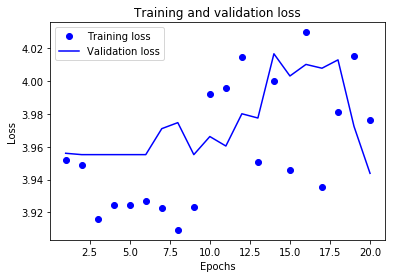

In [165]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

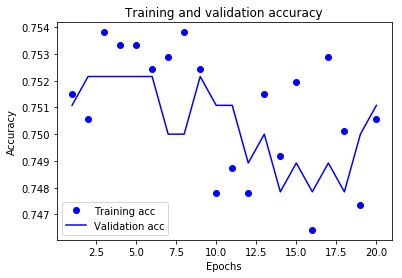

In [166]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()